In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from glob import glob
import re
from tqdm import tqdm_notebook as tqdm
from pathlib import Path
import os

from faceDetectorS3fd.face_detector.detect_engine import FaceDetectionEngine

detector = FaceDetectionEngine(weights_path="faceDetectorS3fd/face_detector/s3fd_convert.pth")

In [4]:
import fnmatch
import os
import re
from pathlib import Path


def resize_by_height(img, new_height):
    '''
    Input: image, new_height
    Returns: image with new height and scaled width
    '''
    height, width = img.shape[:2]
    resize_multiple = new_height / height
    img = cv2.resize(img, None, fx=resize_multiple, fy=resize_multiple, interpolation=cv2.INTER_AREA)
    return img


def get_face_crop(img):

    results = anfas_detector.detect_faces(img)
    if results == []: 
        return results, None

    x, y, w, h = results[0]['box']

    y_border, x_border = img.shape[:2]
    x1, y1, x2, y2 = max(0, x), max(0, y), min(x_border, x+w), min(y_border, y+h)

    face_crop = img[y1:y2, x1:x2]
    return face_crop, round(results[0]['confidence'], 2)


def get_all_fnames(base_folder):
    all_fnames = glob(str(Path(base_folder, '**', '*')), recursive=True)
    all_imgs = []
    patterns = ['*jpg', '*jpeg', '*png']

    for pattern in patterns:
        match = re.compile(fnmatch.translate(pattern), re.IGNORECASE).match
        valid_pths = [pth for pth in all_fnames if match(pth)]
        all_imgs.extend(valid_pths)
                      
    return all_imgs

/home/nikolay/.pyenv/versions/3.7.3/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


81 164 716 901
0 0 811 1080


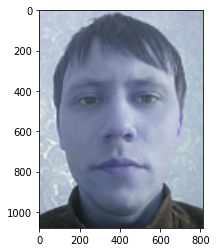

34 171 808 982
0 0 811 1080


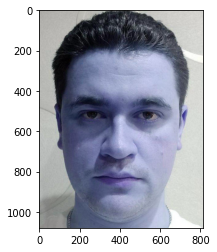

162 240 712 881
0 75 811 1046


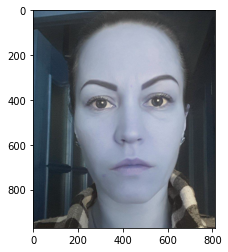

2 145 691 983
0 0 787 1080


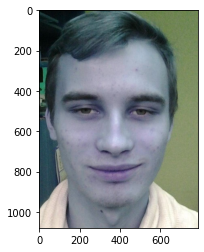

136 249 716 943
0 75 811 1080


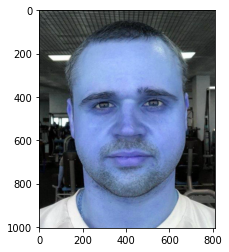

68 222 631 915
0 54 799 1080


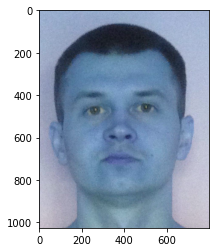

123 200 624 901
0 50 774 1051


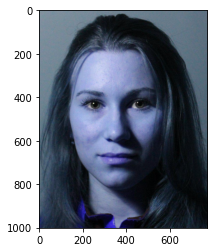

79 257 644 903
0 88 811 1072


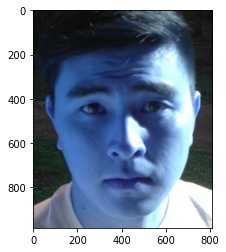

128 151 723 831
0 0 811 1009


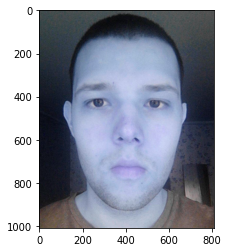

57 204 660 916
0 24 788 1080


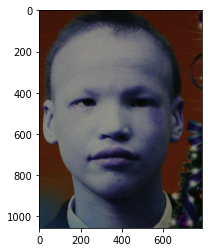

88 201 705 950
0 16 811 1080


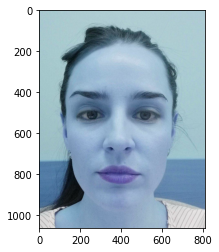

76 226 701 1010
0 39 785 1080


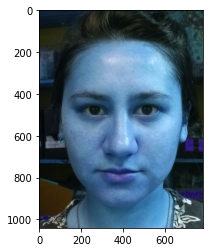

181 100 627 753
48 0 760 886


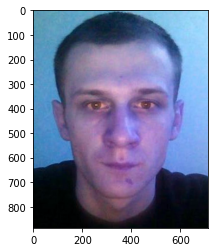

153 135 729 900
0 0 811 1072


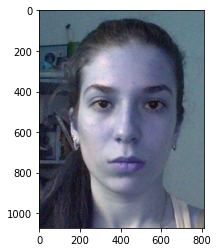

89 157 569 767
0 13 713 911


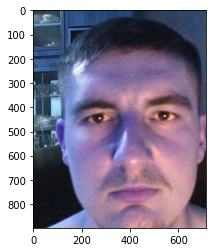

30 199 639 903
0 17 785 1080


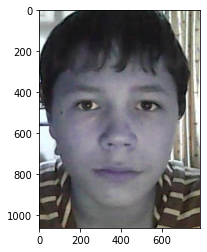

120 213 680 921
0 45 846 1080


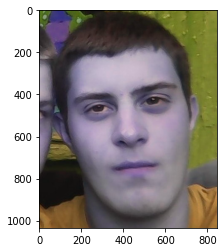

87 143 671 903
0 0 811 1078


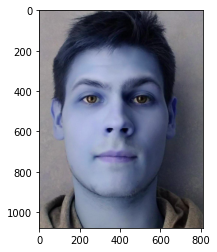

74 179 711 940
0 0 811 1080


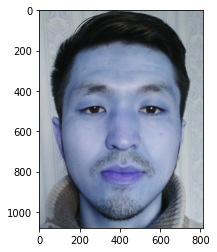

84 178 653 964
0 8 811 1080


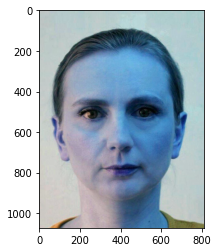

In [50]:
# -*- coding: utf-8 -*-
import cv2
import numpy


base_folder = '/home/nikolay/workspace/MERLIN_CO/01.Glazomer/anfas/anfas_29_all'
# result_base_folder = Path(f'{base_folder}_result')
# if not os.path.exists(result_base_folder):
#     os.mkdir(result_base_folder)
    
pad_coeff = 0.3
    
all_imgs = get_all_fnames(base_folder)
for num, img_path in enumerate(tqdm(all_imgs[:20])):
    folder_name = Path(img_path).parts[-2]
    img_name = Path(img_path).parts[-1]
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    
    preds = detector.predict(img, dilate_bbox=True)
    if len(preds) > 0: 
        xmin, ymin, xmax, ymax = [int(x) for x in preds[0]]
        
        print(xmin, ymin, xmax, ymax)
        
        pad = int((xmax - xmin) * pad_coeff)

        xmin -= pad
        ymin -= pad
        xmax += pad
        ymax += pad

        xmin = max([0, xmin])
        ymin = max([0, ymin])
        xmax = min([w, xmax])
        ymax = min([h, ymax])

        print(xmin, ymin, xmax, ymax)

    crop = img[ymin:ymax, xmin:xmax]
#     cv2.imwrite(str(result_base_folder/folder_name/Path(img_name)), crop)

#     write progress
#     if num % 100 == 0:
#         with open('progress.txt', 'w') as f:
#             f.write(str(num))
            
    plt.imshow(crop)
    plt.show()

In [40]:
crop

array([], shape=(0, 661, 3), dtype=uint8)

In [41]:
xmin, xmax, ymin, ymax

(144, 805, 577, 324)

In [22]:
max([0, -5])

2

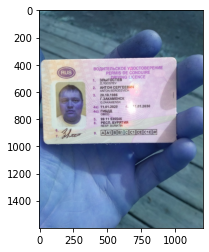

In [44]:
plt.imshow(img)

In [12]:
preds[0]

array([ 37.40899 , 179.31638 , 110.129395, 267.33728 ], dtype=float32)

# Check what folders were not detected with faces

In [21]:
base_folder = '/home/nikolay/Documents/MUST/DS Drivers Faces-20200704T025843Z-001/DS Drivers Faces/Копии документов'
base_folder_names = pd.Series(os.listdir(base_folder))
base_folder_names

0      434
1      040
2      111
3      047
4      242
      ... 
470    194
471    200
472    291
473    163
474    294
Length: 475, dtype: object

In [22]:
result_folder = base_folder+'_result'
result_folder_names = pd.Series(os.listdir(result_folder))
result_folder_names

0      040
1      111
2      047
3      242
4      339
      ... 
450    194
451    200
452    291
453    163
454    294
Length: 455, dtype: object

In [27]:
base_folder_names[~base_folder_names.isin(result_folder_names)]

0          434
9          432
24         360
55         376
91         347
130        014
142        471
168        361
202        472
209    454 (1)
242        422
248        346
270        173
304         72
355        462
365        401
370        275
371    145 (1)
413        431
461        414
dtype: object